In [1]:
import os, sys, pickle
%pylab inline
plt.style.use("default")
from scipy.cluster.hierarchy import linkage, dendrogram
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

Populating the interactive namespace from numpy and matplotlib


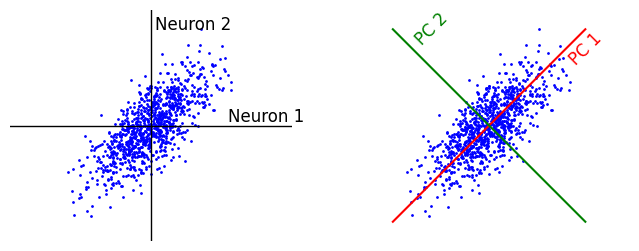

In [54]:
random.seed(0)
U = np.array([[1, 1],[1, -1]])/sqrt(2)
X = U @ np.diag([1, 0.4]) @ randn(2, 1000)
figure(figsize=(8, 3))
subplot(1,2,1); scatter(X[0], X[1], s=1, c = "b"); axis("equal")
# Turn off the spines
gca().set_xticks([]); gca().set_yticks([])
[spine.set_visible(False) for spine in gca().spines.values()]
axhline(0, color="k", lw=1); axvline(0, color="k", lw=1)
text(2, 0, "Neuron 1", ha="left", va="bottom", fontsize=12)
text(.1, 2.4, "Neuron 2", ha="left", va="bottom", fontsize=12)
ylim(-3,3); xlim(-3,3)
subplot(1,2,2); scatter(X[0], X[1], s=1, c = "b"); axis("equal")
gca().set_xticks([]); gca().set_yticks([])
[spine.set_visible(False) for spine in gca().spines.values()]
w = 2.5
plot([-w, w], [-w, w], "r", lw=1.5)
plot([-w, w], [w, -w], "g", lw=1.5)
text(2, 1.5, "PC 1", ha="left", va="bottom", fontsize=12, rotation=45, color="r")
text(-2, 2, "PC 2", ha="left", va="bottom", fontsize=12, rotation=45, color="g")
ylim(-3,3); xlim(-3,3)
savefig("figures/pca_illustration.png", dpi=300, bbox_inches="tight")

In [2]:
# Function to get leaf order from data
def get_leaf_order(data, method="ward"):
    Z = linkage(data, method=method)
    return dendrogram(Z, no_plot=True)["leaves"]


In [3]:
with open("tobias-data/X0Y0.p", "rb") as f:
    data = pickle.load(f)

In [4]:
X0 = data["X0"]
Xm = vstack([X0i.mean(axis=-1) for X0i in X0]).T

In [5]:
odour_order = get_leaf_order(Xm)
roi_order = get_leaf_order(Xm.T)

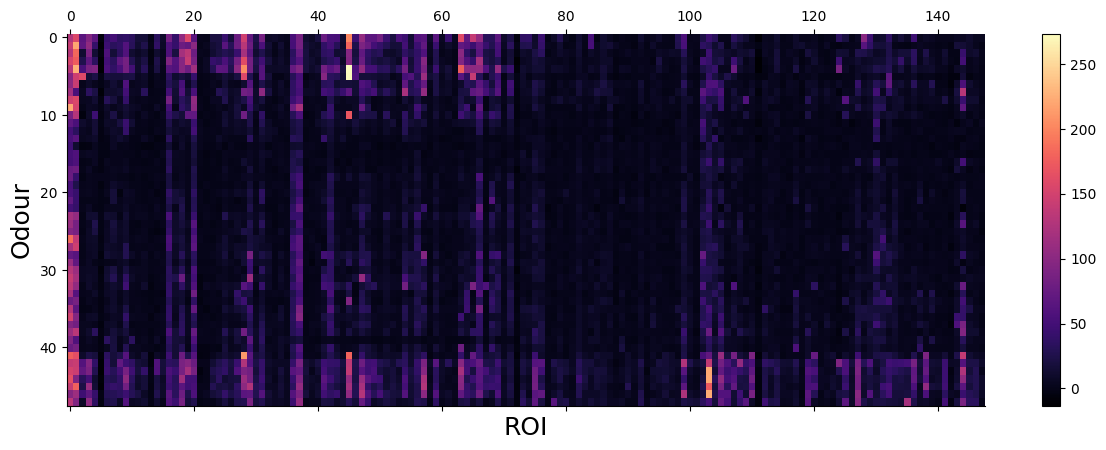

In [6]:
matshow(Xm, cmap="magma"); 
xlabel("ROI", fontsize=18)
ylabel("Odour", fontsize=18)
# Make the colourbar same height as the plot
gca().set_aspect("auto")
colorbar()
savefig("figures/heatmap.png", dpi=300, bbox_inches="tight")

# Figure x1, x2 vs PCA

In [7]:
from sklearn.decomposition import PCA


In [8]:
# Get first two principle components
pca = PCA(n_components=2)
Xm_pca = pca.fit_transform(Xm)


In [9]:
mu = Xm.mean(axis=0)

In [10]:
Xm_ms   = Xm - mu
U, S, V = svd(Xm_ms, full_matrices=False)
Xm_pca  = dot(Xm_ms, V.T)

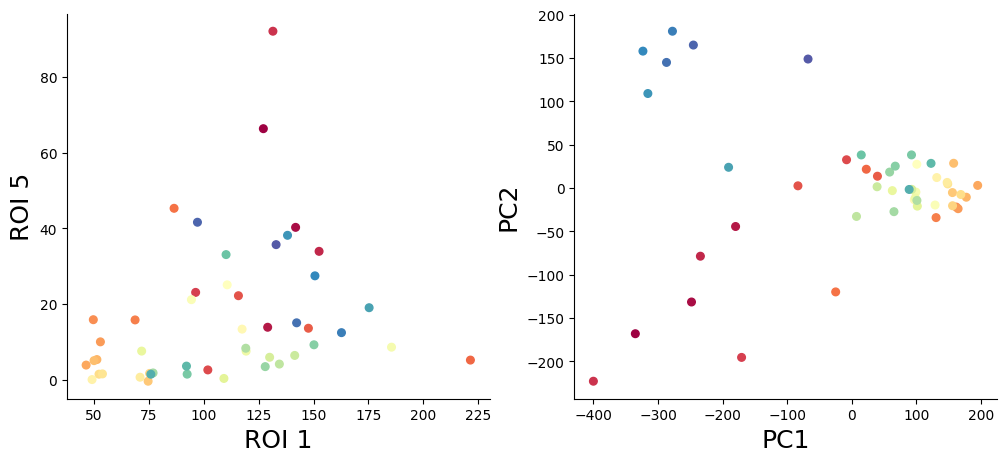

In [11]:
figure(figsize=(12, 5))
subplot(121); scatter(Xm.T[0], Xm.T[4], c = [cm.Spectral(i/48.) for i in range(48)], s=30); xlabel("ROI 1", fontsize=18); ylabel("ROI 5", fontsize=18)
subplot(122); scatter(Xm_pca[:, 0], Xm_pca[:, 1], c = [cm.Spectral(i/48.) for i in range(48)], s=30); xlabel("PC1", fontsize=18); ylabel("PC2", fontsize=18)
savefig("figures/PCA.png", dpi=300, bbox_inches="tight")


# Plot rank 2 approximation

In [12]:
Xm_rec = U[:,:2].dot(diag(S[:2])).dot(V[:2,:])

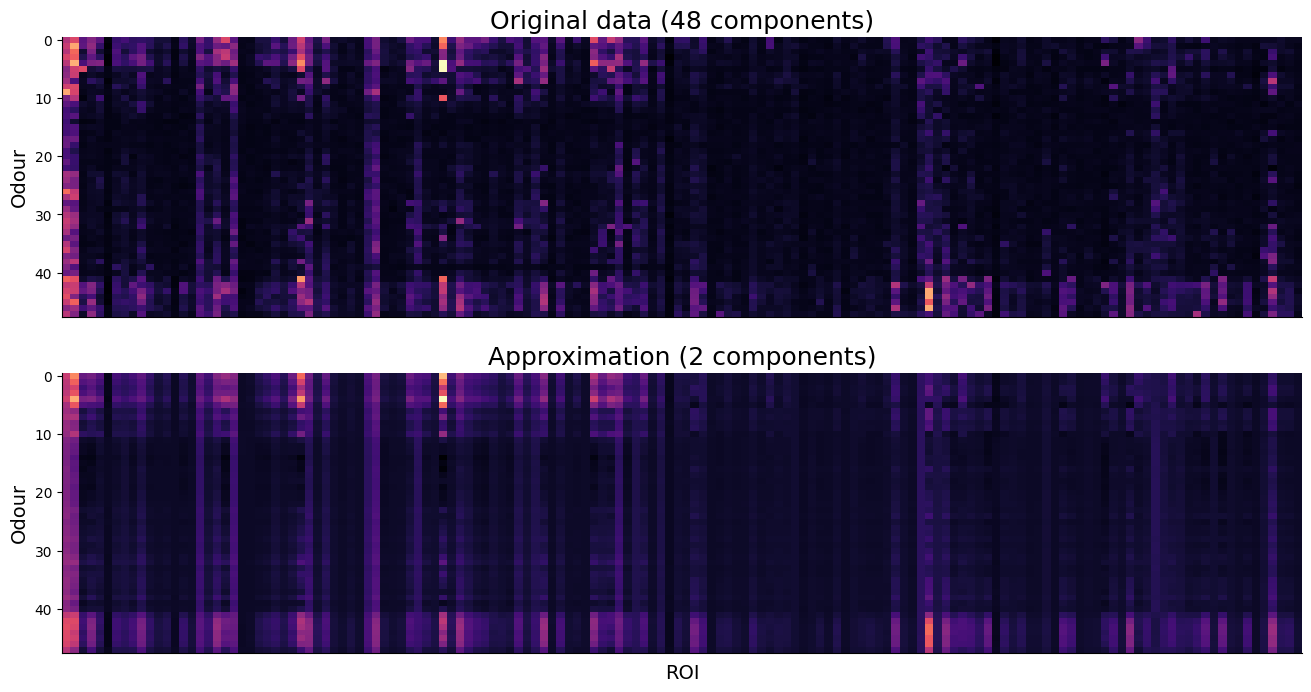

In [13]:
figure(figsize=(16, 8))
subplot(211); matshow(Xm, cmap="magma", fignum=False); 
ylabel("Odour", fontsize=14); title("Original data (48 components)", fontsize=18)
gca().set_aspect("auto"); gca().set_xticks([])
# Make the colourbar same height as the plot

subplot(212); matshow(Xm_rec + mu, cmap="magma", fignum=False);
xlabel("ROI", fontsize=14); ylabel("Odour", fontsize=14); title("Approximation (2 components)", fontsize=18)
gca().set_xticks([]); gca().set_aspect("auto")

savefig("figures/rank2_approx.png", dpi=300, bbox_inches="tight")

# The default coordinates

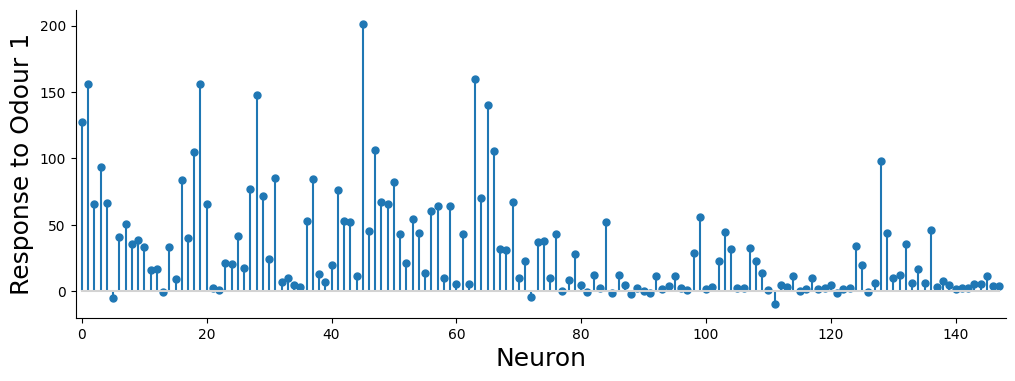

In [55]:
figure(figsize=(12, 4))
odour_resp = Xm[0]
# Make a stem plot showing the response to each odour
# The base colour should be gray
# The marker size should be 10
markerline, stemlines, baseline = stem(odour_resp, basefmt="lightgray")
setp(markerline, markersize=5)
xlabel("Neuron", fontsize=18)
ylabel("Response to Odour 1", fontsize=18)
xlim(-1, len(odour_resp));
# Remove spines
gca().spines["top"].set_visible(False)
gca().spines["right"].set_visible(False)
savefig("figures/one_odour_response.png", dpi=300, bbox_inches="tight")

# Responses of the first two ROIs in two coordinates

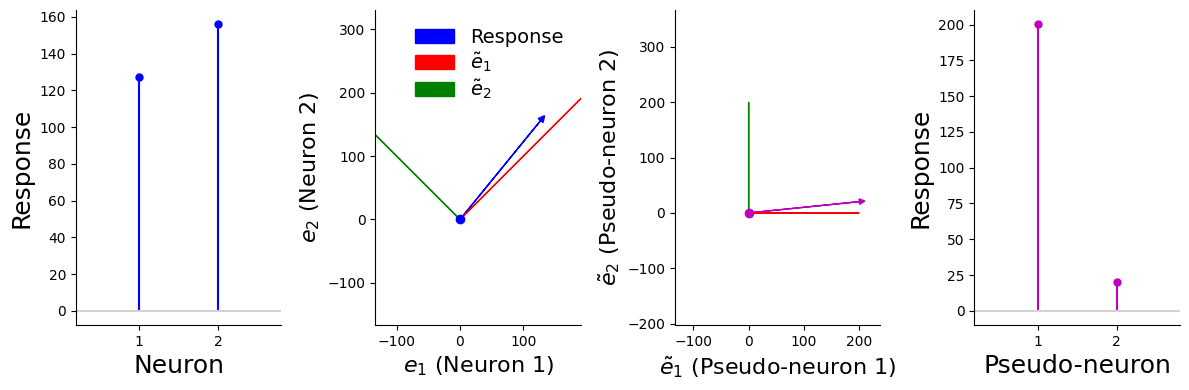

In [73]:
U0 = eye(2)
th = pi/4
U1 = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
x = Xm[0][:2]
figure(figsize=(12,4))
subplot(141)
markerlines, stemlines, baseline = stem(x, basefmt="lightgray")
setp(markerlines, color="blue", markersize=5)
setp(stemlines, color="blue"); xlabel("Neuron", fontsize=18); ylabel("Response", fontsize=18)
xlim(-0.8,1.8); plot(xlim(), [0, 0], "-", color="lightgray")
gca().set_xticks([0,1], labels=["1", "2"])

subplot(142)
# Plot an arrow from the origin to the point x
plt.arrow(0, 0, x[0], x[1], head_width=10, head_length=10, fc='blue', ec='blue', label = "Response"); axis("equal");
plot(0,0, "o", color="b")
xlabel("$e_1$ (Neuron 1)", fontsize=16)
ylabel("$e_2$ (Neuron 2)", fontsize=16)
# Plot the axes at the origin
xl = (-x[0]*1.05, x[0]*1.5); xlim(xl)
yl = (0, x[1]*1.05); ylim(yl)
plt.arrow(0, 0, U1[0,0]*500, U1[1,0]*500, fc = "red",   ec = "red", label="$\\tilde{e}_1$")
plt.arrow(0, 0, U1[0,1]*500, U1[1,1]*500, fc = "green", ec = "green", label="$\\tilde{e}_2$")
legend(fontsize=14, frameon=False, labelspacing=0.2, loc="upper right")
# Remove spines
gca().spines["top"].set_visible(False); gca().spines["right"].set_visible(False); tight_layout()

#quiver(0, 0, x[0], x[1], angles="xy", scale_units="xy", scale=1); xlim(0, 0.1) 
subplot(143)
# Plot an arrow from the origin to the point x
y = dot(U1.T, x)
plt.arrow(0, 0, y[0], y[1], head_width=10, head_length=10, fc='m', ec='m', label = "data"); axis("equal");
plt.arrow(0, 0, 200, 0, fc = "red",   ec = "red", label="$\\tilde{e}_1$")
plt.arrow(0, 0, 0, 200, fc = "green", ec = "green", label="$\\tilde{e}_2$")
plot(0,0, "o", color="m")
xlabel("$\\tilde{e}_1$ (Pseudo-neuron 1)", fontsize=16)
ylabel("$\\tilde{e}_2$ (Pseudo-neuron 2)", fontsize=16)
# Plot the axes at the origin
xlim(xl[0], xl[1]*1.25)
ylim(yl)
#plt.arrow(0, 0, U1[0,0]*500, U1[1,0]*500, ec = "red", label="$\tilde{e}_1$")
#plt.arrow(0, 0, U1[0,1]*500, U1[1,1]*500, ec = "green", label="$\tilde{e}_2$")
# Remove spines
gca().spines["top"].set_visible(False); gca().spines["right"].set_visible(False);

subplot(144)
markerlines, stemlines, baseline = stem(y, basefmt="lightgray")
setp(markerlines, color="m", markersize=5)
setp(stemlines, color="m"); xlabel("Pseudo-neuron", fontsize=18); ylabel("Response", fontsize=18)
xlim(-0.8,1.8); plot(xlim(), [0, 0], "-", color="lightgray")
gca().set_xticks([0,1], labels=["1", "2"])
tight_layout()
savefig("figures/coordinate_transform.png", dpi=300, bbox_inches="tight")



In [119]:
Xm_rec.shape

(48, 148)

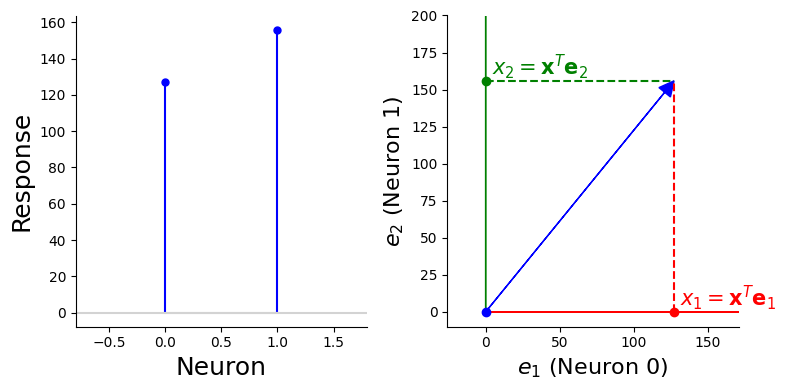

In [266]:
U0 = eye(2)
th = 0
U1 = np.array([[cos(th), -sin(th)], [sin(th), cos(th)]])
x = Xm[0][:2]
figure(figsize=(8,4))
subplot(121)
markerlines, stemlines, baseline = stem(x, basefmt="lightgray")
setp(markerlines, color="blue", markersize=5)
setp(stemlines, color="blue"); xlabel("Neuron", fontsize=18); ylabel("Response", fontsize=18)
xlim(-0.8,1.8); plot(xlim(), [0, 0], "-", color="lightgray")

subplot(122)
# Plot an arrow from the origin to the point x
plt.arrow(0, 0, x[0]*0.95, x[1]*0.95, head_width=10, head_length=10, fc='blue', ec='blue', label = "Response"); axis("equal");
plot(0,0, "o", color="b")
xlabel("$e_1$ (Neuron 0)", fontsize=16)
ylabel("$e_2$ (Neuron 1)", fontsize=16)
# Plot the axes at the origin
plt.arrow(0, 0, U1[0,0]*500, U1[1,0]*500, fc = "red",   ec = "red", label="${e}_1$")
plt.arrow(0, 0, U1[0,1]*500, U1[1,1]*500, fc = "green", ec = "green", label="${e}_2$")
plot([x[0], x[0]], [0, x[1]], "--", color="red"); plot(x[0], 0, "o", color="red");
text(x[0], 0, " $x_1 = \mathbf{x}^T \mathbf{e}_1$", fontsize=15, horizontalalignment='left', verticalalignment='bottom', color="red")
plot([0, x[0]], [x[1], x[1]], "--", color="green"); plot(0, x[1], "o", color="green")
text(0, x[1], " $x_2 = \mathbf{x}^T \mathbf{e}_2$", fontsize=15, horizontalalignment='left', verticalalignment='bottom', color="green")
#legend(fontsize=10, frameon=False, labelspacing=0.2)
xlim(-5,150)
ylim(-10,200)
# Remove spines
gca().spines["top"].set_visible(False); gca().spines["right"].set_visible(False); tight_layout()
savefig("figures/projections.png", dpi=300, bbox_inches="tight")


# Responses of one neuron

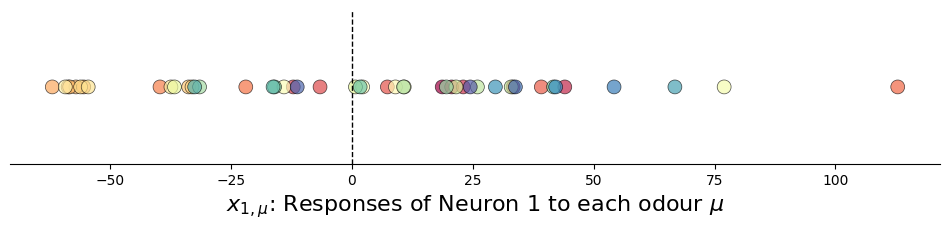

In [63]:
figure(figsize=(12,2))
x1mu = Xm[:,0] - mean(Xm[:,0]) 
scatter(x1mu, 0*x1mu, c = [cm.Spectral(i/48.) for i in range(48)], s=100, edgecolor="k", lw=0.5, alpha=0.7)
#plot(, 0*Xm[:, 0], "bo")
gca().set_yticks([])
# Remove y axis
gca().spines["left"].set_visible(False)
xlabel("$x_{1, \mu}$: Responses of Neuron 1 to each odour $\mu$", fontsize=16)
# Vertical line at 0
plot([0, 0], [-1, 1], "--", lw=1,color="k")
ylim(-1, 1)
savefig("figures/neuron0.png", dpi=300, bbox_inches="tight")


# Variance vs Mean absolute Deviation

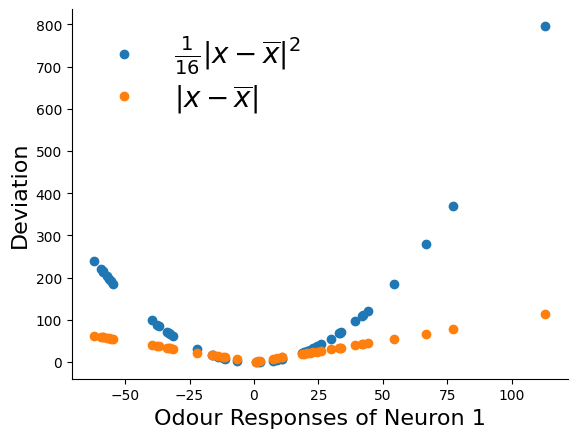

In [69]:
x = Xm[:,0] - mean(Xm[:,0])
plot(x, (x/4)**2, "o", label="$\\frac{1}{16}|x - \overline{x}|^2$")
plot(x, abs(x), "o", label="$|x - \overline{x}|$")
xlabel("Odour Responses of Neuron 1", fontsize=16)
ylabel("Deviation", fontsize=16)
legend(fontsize=20, frameon=False, labelspacing=0.2)
savefig("figures/variance_vs_mad.png", dpi=300, bbox_inches="tight")

In [70]:
svd([[-1,0],[0,-1]])

(array([[1., 0.],
        [0., 1.]]),
 array([1., 1.]),
 array([[-1., -0.],
        [-0., -1.]]))

# Different degrees of correlation

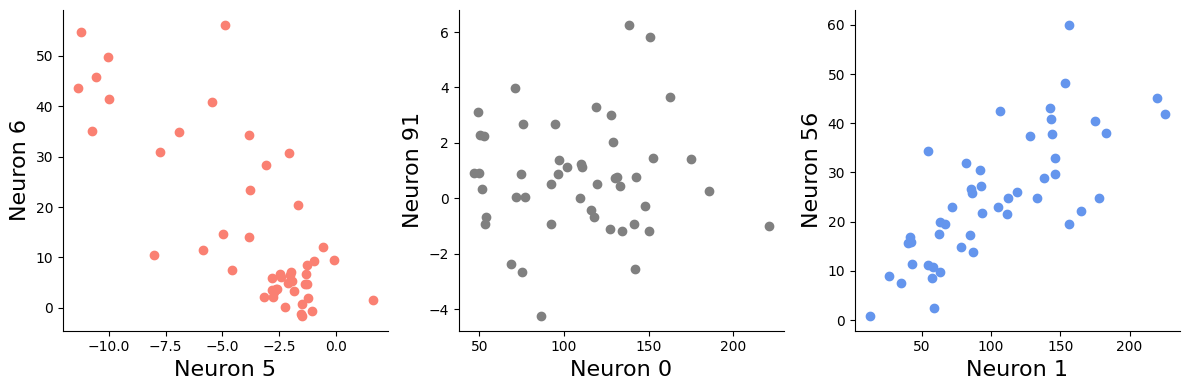

In [343]:
ρ = corrcoef(Xm.T)
target_vals = [-0.8, 0, 0.8]
# Sort the pairwise by proximity to the target values
idx = [np.where(np.abs(ρ - tv) < 0.05) for tv in target_vals]
plot_which =[2, 0, 0]
figure(figsize=(12, 4))
for i, (w, iplot,col) in enumerate(zip(idx, plot_which, ["cornflowerblue", "gray", "salmon"][::-1])):
    subplot(1, 3, i+1)
    r, c = w
    scatter(Xm[:, r[iplot]], Xm[:, c[iplot]], color=col)
    #title(f"Correlation = {ρ[r[iplot], c[iplot]]:.2f}", fontsize=18)
    xlabel(f"Neuron {r[iplot]}", fontsize=16)
    ylabel(f"Neuron {c[iplot]}", fontsize=16)
tight_layout()
savefig("figures/correlation.png", dpi=300, bbox_inches="tight")


# Covariance matrix

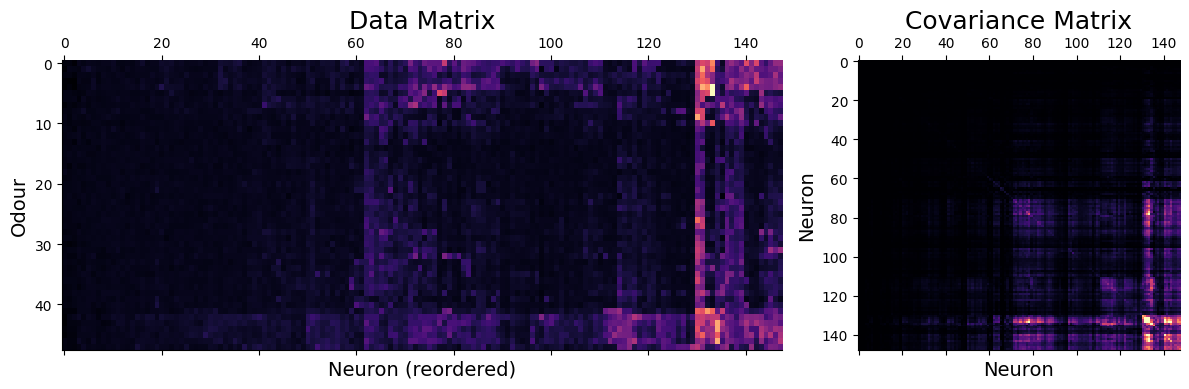

In [360]:
figure(figsize=(12, 4))
# Plot the data in the left subplots
subplot(1, 3,(1,2))
matshow(Xm[:, roi_order], cmap="magma", fignum=False)
xlabel("Neuron (reordered)", fontsize=14)
ylabel("Odour", fontsize=14)
axis("auto")
title("Data Matrix", fontsize=18)
subplot(1, 3, 3)
C = cov(Xm[:, roi_order].T)
matshow(C, cmap="magma", fignum=False, vmin=0, vmax=2000);
xlabel("Neuron", fontsize=14)
ylabel("Neuron", fontsize=14)
title("Covariance Matrix", fontsize=18)
axis("auto")
tight_layout()
savefig("figures/covariance_matrix.png", dpi=300, bbox_inches="tight")

# Generate data with different participation ratios

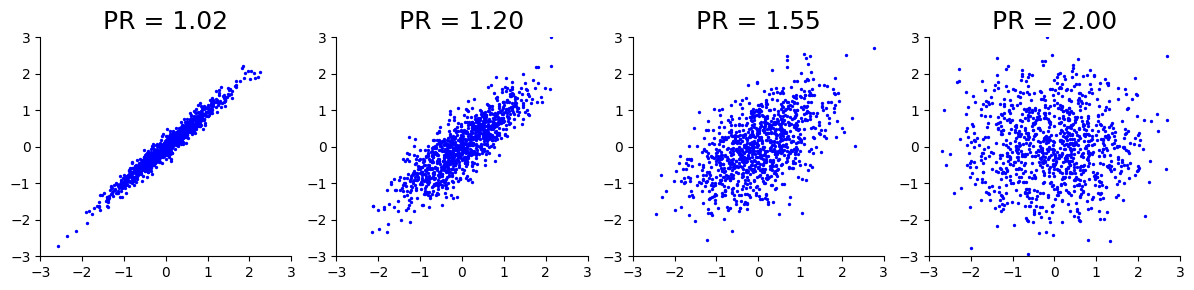

In [393]:
s2 = [0.01, 0.1, 0.3, 1]
U = np.array([[1, 1], [1, -1]])/sqrt(2)
figure(figsize=(12, 3))
for i, s in enumerate(s2):
    subplot(1, 4, i+1)
    X = U @ np.diag([1, sqrt(s)]) @ randn(2, 1000)
    scatter(X[0], X[1], color="b", s=2)
    xlim(-3, 3)
    ylim(-3, 3)
    #axis("square")
    pr = (1 + s)**2/(1 + s**2)
    title(f"PR = {pr:.2f}", fontsize=18)
#    gca().set_yticks([])
#    gca().set_xticks([])
tight_layout()
savefig("figures/participation_ratio.png", dpi=300, bbox_inches="tight")

# Sequential approximation

In [9]:
mu = mean(Xm, axis=0)
Xm_ms   = Xm - mu
U, S, V = svd(Xm_ms, full_matrices=False)
Xm_pca  = dot(Xm_ms, V.T)

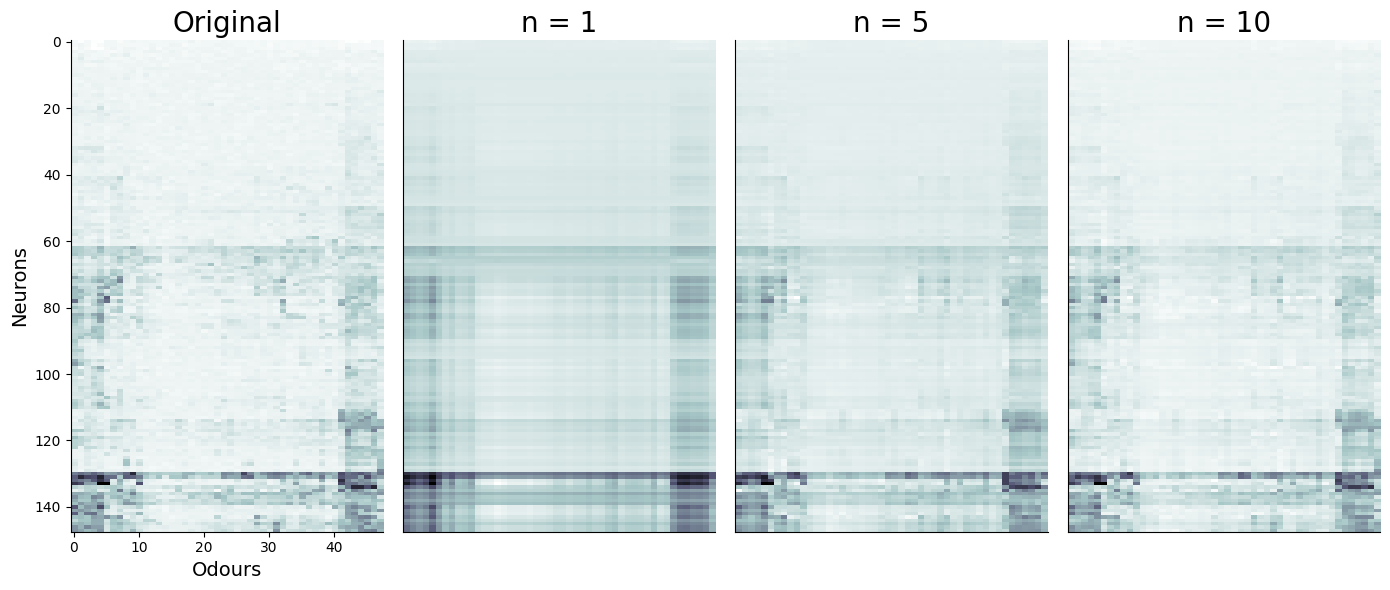

In [428]:
n_comps = [1, 5, 10]
figure(figsize=(14, 6))
subplot(1,len(n_comps)+1,1)
cmap = cm.bone_r
matshow(Xm.T[roi_order], cmap=cmap, fignum=False); title("Original", fontsize=20)
#gca().set_yticks([])
#gca().set_xticks([])
# Put the xticks at the bottom
gca().xaxis.set_ticks_position('bottom')
xlabel("Odours", fontsize=14)
ylabel("Neurons", fontsize=14)
axis("auto")
for i, n_comp in enumerate(n_comps):
    subplot(1, len(n_comps)+1, i+2)
    Xr = dot(Xm_pca[:, :n_comp], V[:n_comp]) + mu
    matshow(Xr.T[roi_order], cmap=cmap, fignum=False)
    axis("auto")
    title(f"n = {n_comp}", fontsize=20)
    gca().set_yticks([])
    gca().set_xticks([])
tight_layout()
savefig("figures/pca_tobias.png", dpi=300, bbox_inches="tight")    


# Explained variance

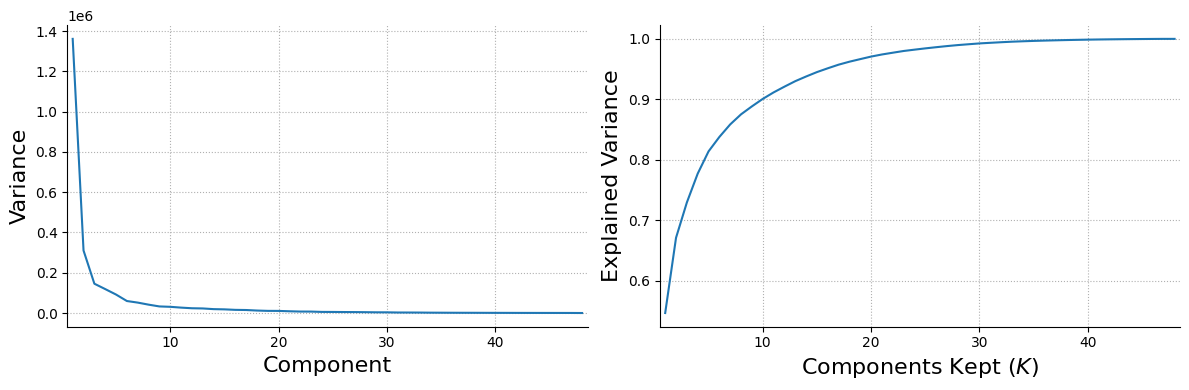

In [446]:
figure(figsize=(12, 4))
subplot(1,2,1); plot(arange(1,len(S)+1), S**2); xlim(0.5, len(S)+0.5)
xlabel("Component", fontsize=16); ylabel("Variance", fontsize=16); grid(True, linestyle=":")
subplot(1,2,2); plot(arange(1, len(S)+1), cumsum(S**2)/sum(S**2)); xlim(0.5, len(S)+0.5)
xlabel("Components Kept ($K$)", fontsize=16); ylabel("Explained Variance", fontsize=16); grid(True, linestyle=":")
tight_layout()
savefig("figures/explained_variance.png", dpi=300, bbox_inches="tight")

# PCA projections

In [464]:
V.shape

(48, 148)

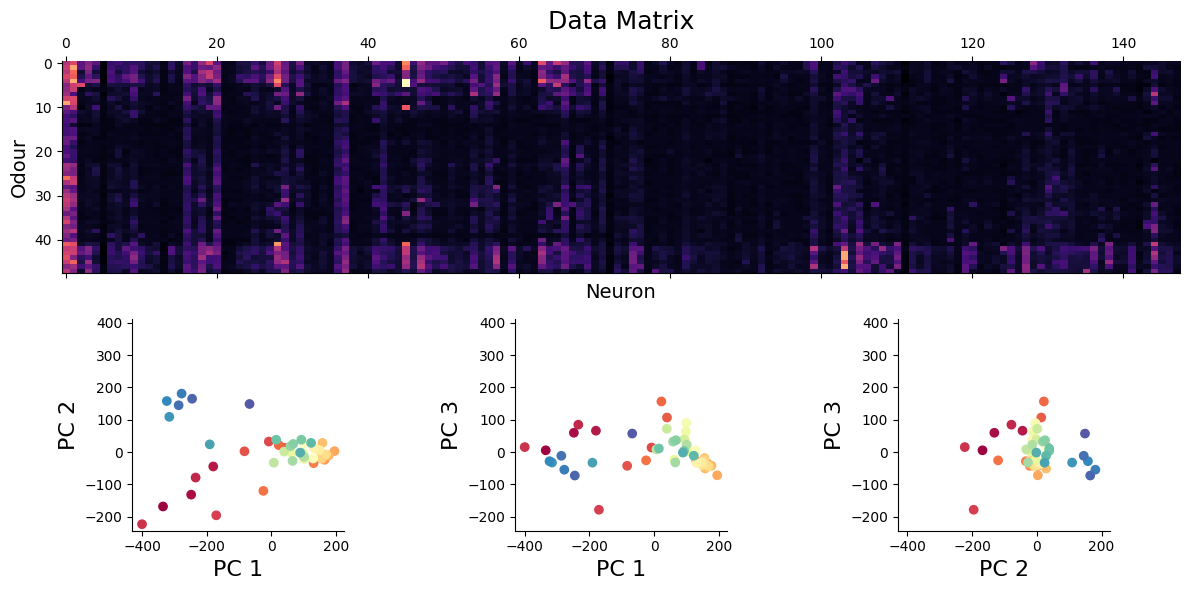

In [472]:

figure(figsize=(12, 6))
# Plot the raw data across the top row
subplot(2,3,(1,3));
matshow(Xm, cmap="magma", fignum=False); axis("auto")
xlabel("Neuron", fontsize=14)
ylabel("Odour", fontsize=14)
title("Data Matrix", fontsize=18)
iplt = 1
xl = None
yl = None
for i in range(2):
    for j in range(i+1,3):
        subplot(2,3,iplt+3)
        scatter(Xm_pca[:, i], Xm_pca[:, j], c = [cm.Spectral(i/48.) for i in range(48)])
        axis("square")
        xl = xlim() if xl is None else xl
        yl = ylim() if yl is None else yl
        xlim(xl); ylim(yl)
        xlabel(f"PC {i+1}", fontsize=16)
        ylabel(f"PC {j+1}", fontsize=16)
        iplt += 1
tight_layout()
savefig("figures/pca_projections.png", dpi=300, bbox_inches="tight")        

In [ ]:
from matplotlib.gridspec import GridSpec

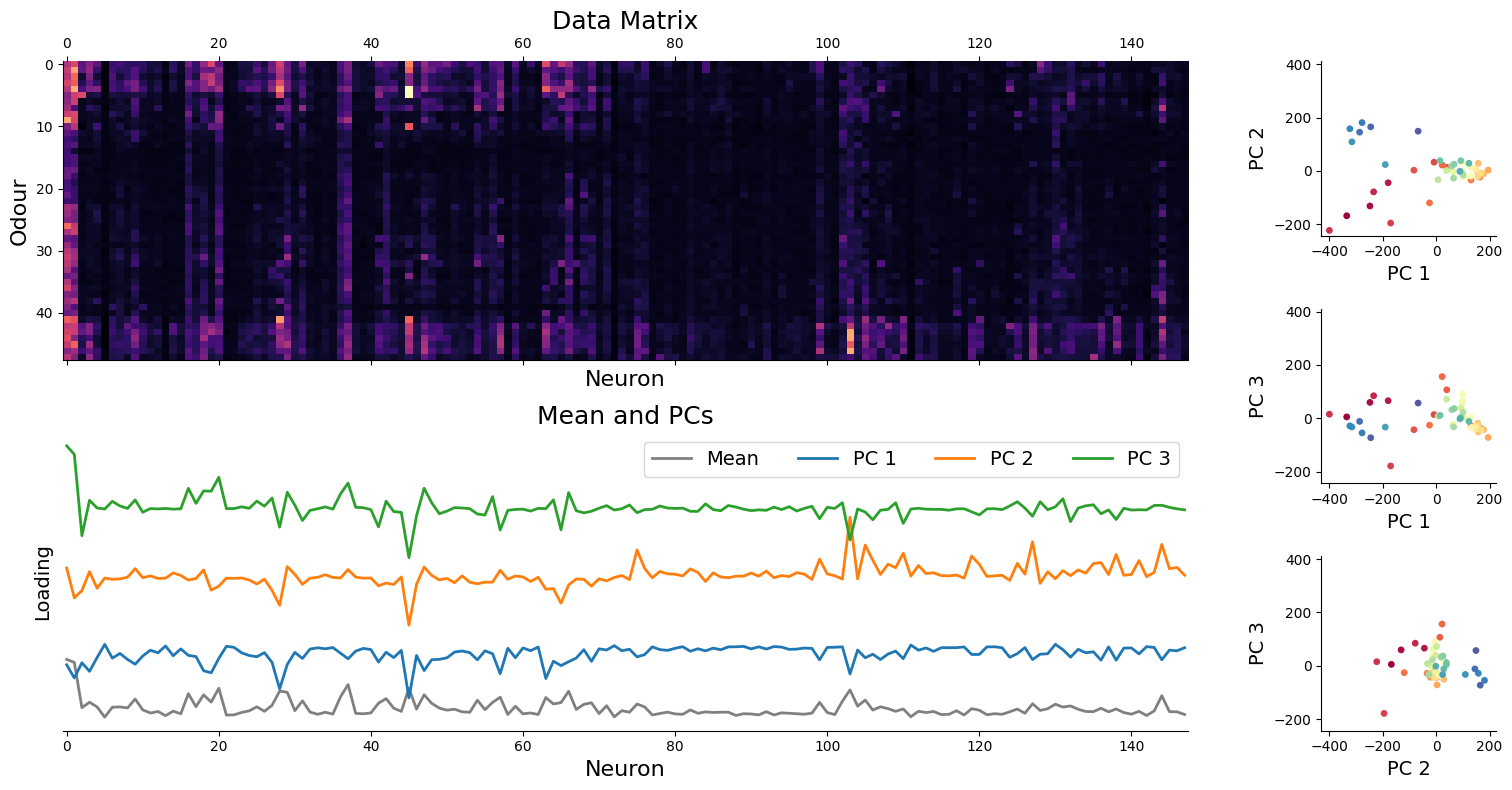

In [511]:
figure(figsize=(16, 8))
gs = GridSpec(6, 4)
ax_data = subplot(gs[:3, :3])
ax_pcs  = subplot(gs[3:, :3], sharex=ax_data)
ax_proj = [subplot(gs[2*i:2*(i+1), 3]) for i in range(3)]
sca(ax_data)
matshow(Xm, cmap="magma", fignum=False); axis("auto")
xlabel("Neuron", fontsize=16)
ylabel("Odour", fontsize=16)
title("Data Matrix", fontsize=18)
sca(ax_pcs)
P = vstack([mu/norm(mu), V[:3]]) + arange(4)[:, None]/2
h = plot(P.T, lw=2)
# Set the colors
h[0].set_color("gray")
[hi.set_color(f"C{i}") for i, hi in enumerate(h[1:])]
# Make the legend horizontal
legend(h, ["Mean"] + [f"PC {i+1}" for i in range(3)], fontsize=14, labelspacing=0, loc="upper right", ncol=4)
xlabel("Neuron", fontsize=16)
title("Mean and PCs", fontsize=18)
# Remove yaxis 
gca().set_yticks([])
# Remove y spines
gca().spines["left"].set_visible(False)
ylabel("Loading", fontsize=14)
iplt = 1
xl = None
yl = None
for i in range(2):
    for j in range(i+1,3):
        plt.sca(ax_proj[iplt-1])#(2,3,iplt+3)
        scatter(Xm_pca[:, i], Xm_pca[:, j], c = [cm.Spectral(i/48.) for i in range(48)], s=15)
        axis("square")
        xl = xlim() if xl is None else xl
        yl = ylim() if yl is None else yl
        xlim(xl); ylim(yl)
        xlabel(f"PC {i+1}", fontsize=14)
        ylabel(f"PC {j+1}", fontsize=14)
        iplt += 1
tight_layout()
savefig("figures/pca_projections_pcs.png", dpi=300, bbox_inches="tight")


# CCA for dimensionality reduction

In [10]:
Y0 = data["Y0"]
Ym = vstack([Y0i.mean(axis=-1) for Y0i in Y0]).T
mu_y = Ym.mean(axis=0)
Ym_ms = Ym - mu_y


In [11]:
UU, ss, VVt = svd(Ym_ms.T @ Xm_ms, full_matrices=False)
VV = VVt.T

In [12]:
YC = Ym_ms @ UU
XC = Xm_ms @ VV

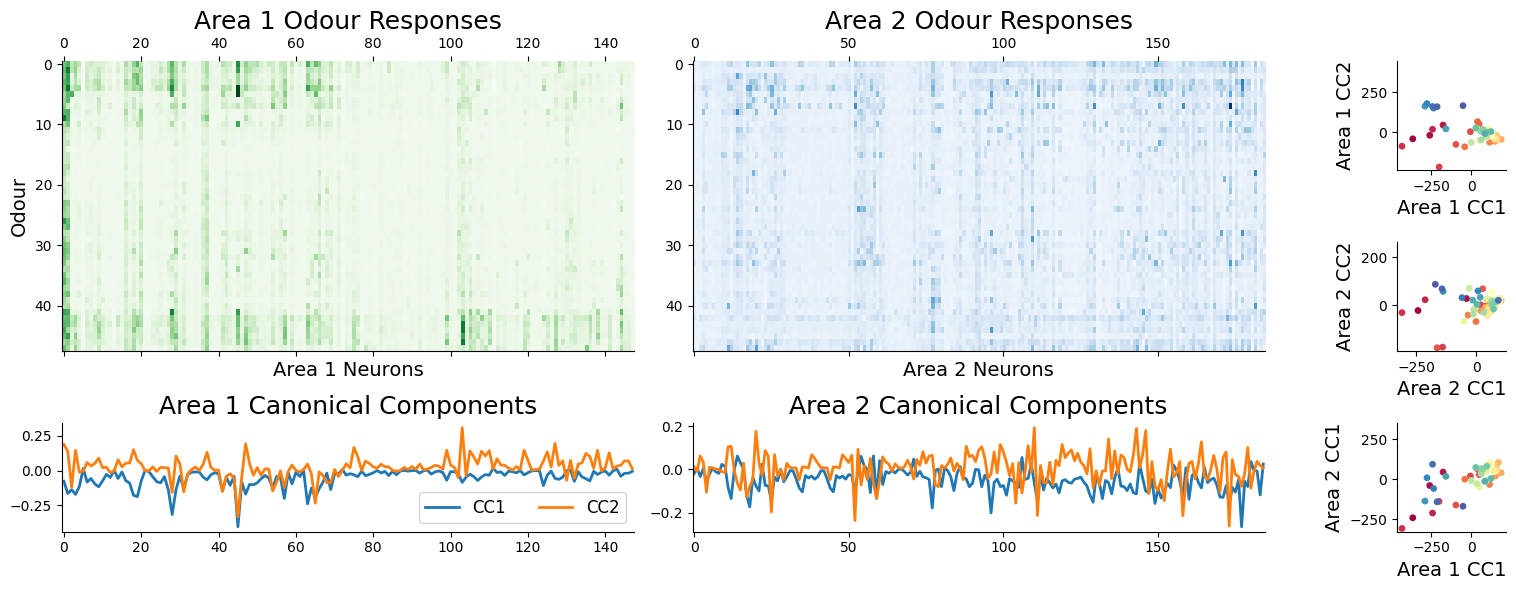

In [21]:
figure(figsize=(16, 6))
gs = GridSpec(6, 5)
ax_X = subplot(gs[:4, :2])
ax_Y = subplot(gs[:4, 2:4])
ax_CCX = subplot(gs[4:, :2], sharex=ax_X)
ax_CCY = subplot(gs[4:, 2:4], sharex=ax_Y)
ax_proj = [subplot(gs[2*i:(2*i+2), 4]) for i in range(3)]
sca(ax_X); matshow(Xm, cmap="Greens", fignum=False); axis("auto");
xlabel("Area 1 Neurons", fontsize=14)
ylabel("Odour", fontsize=14);
title("Area 1 Odour Responses", fontsize=18)
sca(ax_Y); matshow(Ym, cmap="Blues", fignum=False); axis("auto"); title("Area 2 Odour Responses", fontsize=18)
xlabel("Area 2 Neurons", fontsize=14)
sca(ax_CCX); h = plot(VV[:,:2], lw=2);
legend(h, ["CC1", "CC2"],fontsize=12, ncols=2 )
title("Area 1 Canonical Components", fontsize=18)
sca(ax_CCY); plot(UU[:,:2], lw=2); title("Area 2 Canonical Components", fontsize=18)
sca(ax_proj[0]); scatter(XC[:,0], XC[:,1], c=[cm.Spectral(i/48.) for i in range(48)], s=15);
xlabel("Area 1 CC1", fontsize=14); ylabel("Area 1 CC2", fontsize=14); axis("square")
sca(ax_proj[1]); scatter(YC[:,0], YC[:,1], c=[cm.Spectral(i/48.) for i in range(48)], s=15);
xlabel("Area 2 CC1", fontsize=14); ylabel("Area 2 CC2", fontsize=14); axis("square")
sca(ax_proj[2]); scatter(XC[:,0], YC[:,0], c=[cm.Spectral(i/48.) for i in range(48)], s=15);
xlabel("Area 1 CC1", fontsize=14); ylabel("Area 2 CC1", fontsize=14); axis("square")
tight_layout()
savefig("figures/cca_projections.png", dpi=300, bbox_inches="tight")



In [540]:
cov(Ym_ms @ UU[:,0], Xm_ms @ VV[:,0])

array([[ 9545.64170592, 11818.29386145],
       [11818.29386145, 27388.58382615]])

In [532]:
Xm_ms @ V

TypeError: unsupported operand type(s) for @: 'tuple' and 'tuple'

In [530]:
Xm_ms @ VV[:,0]

array([-3.66178246e+02, -2.60216657e+02, -1.76852824e+02, -2.42585899e+02,
       -4.33711896e+02, -2.01692906e+02, -6.03501122e+00, -9.67519514e+01,
        4.84775590e+01,  3.87430214e+01, -4.13985840e+01,  1.13889237e+02,
        1.47389098e+02,  1.51111586e+02,  1.86118221e+02,  1.69738343e+02,
        1.58174905e+02,  1.52313400e+02,  1.45876334e+02,  1.58334316e+02,
        1.40710520e+02,  1.40862353e+02,  1.25264328e+02,  9.30691938e+01,
        1.04806260e+02,  1.23969510e+02,  1.06210998e+02,  1.01557764e+02,
        4.97849309e+01,  9.28243864e+01,  9.12899302e+01,  3.54646408e+01,
       -4.23274435e-01,  9.53970139e+01,  6.12620405e+01,  5.95802352e+01,
        7.31345395e+01,  9.73493978e+01,  2.76540220e+01,  1.22741269e+02,
        8.38022422e+01, -1.59041555e+02, -2.90058158e+02, -2.77465007e+02,
       -2.35698296e+02, -2.42513558e+02, -2.14066318e+02, -5.22114511e+01])

In [529]:
Ym_ms @ UU[:,0]

array([-241.52567263,  -39.98152817,   44.29466326, -211.93756992,
       -308.20335734, -139.36733967,   19.92136093, -161.97527987,
         27.83548031,   61.34968346,   -0.550273  ,  -33.36813503,
         76.64266599,   19.14087594,   39.59275324,  104.17040482,
         83.92372665,   81.85949841,   45.80032145,   51.56918551,
         60.69973399,   47.10394656,   98.46009763,   73.72617344,
         66.14481212,   87.74642676,   99.07779615,   85.02416346,
        -49.46709405,   49.94664674,   -6.65783443,  -29.16583787,
         -9.3495918 ,  -11.33170627,   32.48538934,   65.65390604,
         65.25989468,   80.9764435 ,   73.07472083,    4.04396159,
        -13.96914829,   17.23111337, -137.09298525,    8.24293047,
        -58.68844262,   92.83293373, -141.62305142, -169.57686275])

In [527]:
VV.shape

(148, 148)

In [520]:
cov(UU[:,0].T@Ym_ms, V[:,0].T@Xm_ms)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 48 is different from 185)

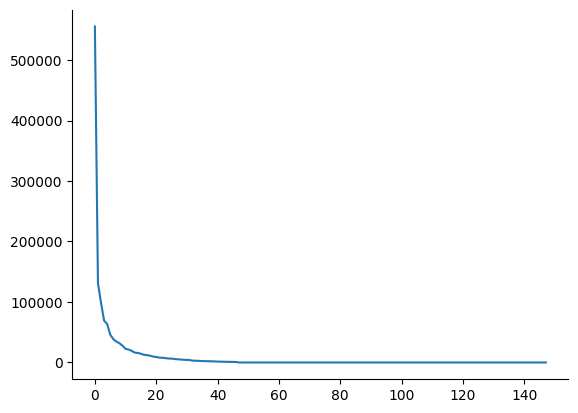

In [519]:
plot(ss)

In [516]:
UU.shape

(185, 148)

In [517]:
SS, 

array([5.55459811e+05, 1.31035451e+05, 9.84534271e+04, 6.92138691e+04,
       6.36243695e+04, 4.60634485e+04, 3.86344179e+04, 3.44767766e+04,
       3.18441423e+04, 2.77479266e+04, 2.24528737e+04, 2.14635628e+04,
       1.91242193e+04, 1.62862618e+04, 1.57004719e+04, 1.44273877e+04,
       1.26951153e+04, 1.21217295e+04, 1.11925206e+04, 9.70404883e+03,
       9.20869688e+03, 8.02446268e+03, 7.80835872e+03, 7.07067735e+03,
       6.51779879e+03, 6.46611490e+03, 5.66375053e+03, 5.20853828e+03,
       4.66036723e+03, 4.47369953e+03, 4.21944778e+03, 3.94877327e+03,
       2.97900794e+03, 2.83135530e+03, 2.67554794e+03, 2.31694153e+03,
       2.19318793e+03, 2.01016069e+03, 1.93169044e+03, 1.78833855e+03,
       1.43627349e+03, 1.41470668e+03, 1.19031387e+03, 1.15928133e+03,
       1.03052667e+03, 9.43705154e+02, 7.43255080e+02, 9.64186120e-11,
       7.20692536e-11, 5.57650562e-11, 4.87132996e-11, 4.23905154e-11,
       4.20746269e-11, 4.20746269e-11, 4.20746269e-11, 4.20746269e-11,
      